### Acá grafico los datos del plot de Algorry et al 2017 con los datos observacionales de Corsini 2011
### También voy a agregar los datos observacionales de Font et al 2017 y en el mismo plot ubico mi galaxia

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cm = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/barras/lbar_time.dat')
time = cm[:,1]
lbar = cm[:,2]

print 'lbar=', lbar[0]

cm0      = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/barras/rcorot_phi_time.dat')
time0    = cm0[:,1]
rcor_phi = cm0[:,2]

print 'Rcorot=', rcor_phi[0]

read    = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/datos_corsini.dat')
l_bar   = read[:,0]
lbar_e  = read[:,1]
lbar_er = read[:,2]
rcor    = read[:,3]
rcor_e  = read[:,4]
rcor_er = read[:,5]

read2    = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/datos_algorry.dat')
lbar_david = read2[:,0]
rcor_david  = read2[:,1]

lbar= 1.524616
Rcorot= 2.288038


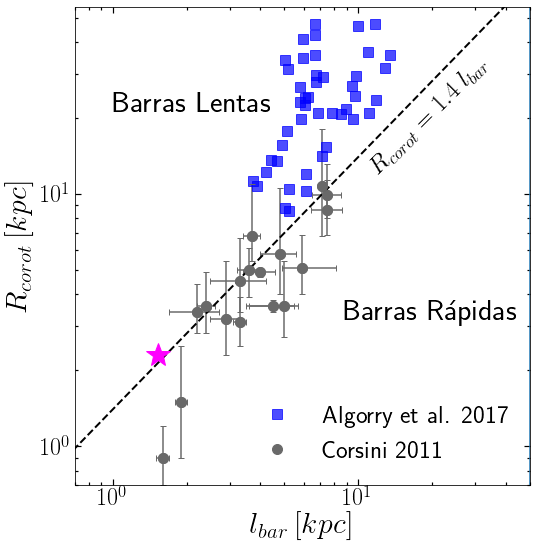

In [8]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

algorry, = ax.plot(lbar_david,rcor_david,'s', markersize=10, color='b',alpha=0.7)
corsini, = ax.plot(l_bar,rcor,'o', markersize=10, color='dimgray') 
ax.errorbar(l_bar,rcor,xerr=[lbar_er,lbar_e], yerr=[rcor_er,rcor_e], color='dimgray', fmt='o', markersize=10, capsize=3)
ax.plot([0,50],[0,70], 'k--', lw=2)
ax.plot(lbar[0],rcor_phi[0],'*', markersize=25, color='magenta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7,50)
ax.set_ylim(0.7,55)
ax.axvline(50)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$l_{bar}\:[kpc]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$R_{corot}\:[kpc]$',fontsize=30)#, color='lightgray')
ax.text(x = 20, y = 20, s = u'$R_{corot}=1.4\;l_{bar}$', fontsize = 25, rotation= 45,  style='italic',
         verticalalignment = 'center', horizontalalignment = 'center')
# ax.text(x = 1, y = 40, s = u'Algorry et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='b')
# ax.text(x = 1, y = 30, s = u'Corsini, 2011', fontsize = 20, va = 'bottom', ha = 'left', color='dimgray')
ax.text(x = 1, y = 20, s = u'Barras Lentas', fontsize = 30, va = 'bottom', ha = 'left', color='k', style='italic')
ax.legend([algorry, corsini],['Algorry et al. 2017', 'Corsini 2011'],fontsize=25, frameon=False, loc=4)
ax.text(x = 20, y = 3, s = u'Barras Rápidas', fontsize = 30, va = 'bottom', ha = 'center',  color='k', style='italic')
                   
fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

### Agrego los datos de Font et al 2017


In [62]:
# from matplotlib import cm
# cgen = cm.get_cmap(name="Paired")
# colors = cgen(np.linspace(0, 1, 3))
# colors[0]

array([ 0.65098039,  0.80784314,  0.89019608,  1.        ])

In [7]:
dist = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/Font2017_data/distancia.dat')

ydata = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/Font2017_data/rcorot.dat')
rcorot = ydata[:,0]
er_cor = ydata[:,1]

xdata = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/Font2017_data/lbar.dat')
lbar_ = xdata[:,0]
er_lbar = xdata[:,1]

conv_rad = pi/(180*3600)
L_bar = lbar_ * dist*1e3 * conv_rad
errorL = er_lbar * dist*1e3 * conv_rad
Rcor = rcorot * dist*1e3 * conv_rad
errorR = er_cor * dist*1e3 * conv_rad

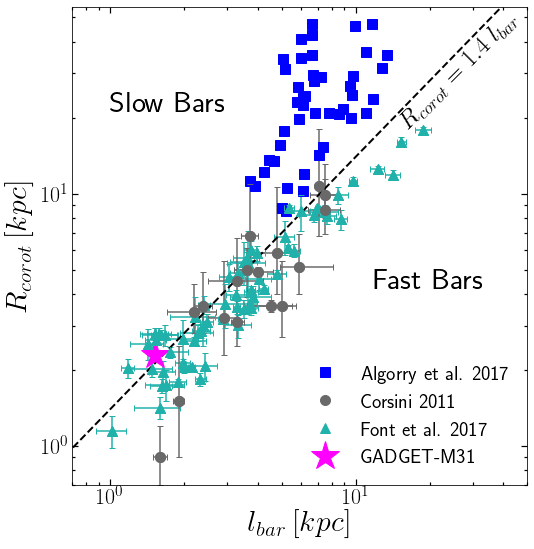

In [9]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

algorry, = ax.plot(lbar_david,rcor_david,'s', markersize=10, color='b')#,alpha=0.7)
corsini, = ax.plot(l_bar,rcor,'o', markersize=10, color='dimgray')
font,    = ax.plot(L_bar,Rcor,'^', markersize=10, color='lightseagreen')
ax.errorbar(L_bar,Rcor,xerr=[errorL,errorL], yerr=[errorR,errorR], color='lightseagreen', fmt='^', markersize=10, capsize=3)
ax.errorbar(l_bar,rcor,xerr=[lbar_er,lbar_e], yerr=[rcor_er,rcor_e], color='dimgray', fmt='o', markersize=10, capsize=3)

ax.plot([0,50],[0,70], 'k--', lw=2)
GDM31,= ax.plot(lbar[0],rcor_phi[0],'*', markersize=30, color='magenta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7,50)
ax.set_ylim(0.7,55)
# ax.axvline(50)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$l_{bar}\:[kpc]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$R_{corot}\:[kpc]$',fontsize=30)#, color='lightgray')
ax.text(x = 27, y = 30, s = u'$R_{corot}=1.4\;l_{bar}$', fontsize = 25, rotation= 45,  style='italic',
         verticalalignment = 'center', horizontalalignment = 'center')
# # fig.savefig('/home/ornela/Dropbox/Presentaccion_AAA/lbar_time.png', dpi = 100)
# ax.text(x = 1, y = 40, s = u'Algorry et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='darkgreen')
# ax.text(x = 1, y = 30, s = u'Corsini, 2011', fontsize = 20, va = 'bottom', ha = 'left', color='darkorange')
# ax.text(x = 1, y = 23, s = u'Font et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='b')
ax.text(x = 1, y = 20, s = u'Slow Bars', fontsize = 30, va = 'bottom', ha = 'left', color='k', style='italic')
ax.text(x = 20, y = 4, s = u'Fast Bars', fontsize = 30, va = 'bottom', ha = 'center',  color='k', style='italic')
ax.legend([algorry, corsini, font, GDM31],['Algorry et al. 2017', 'Corsini 2011', 'Font et al. 2017', 'GADGET-M31'],fontsize=20, frameon=False, loc=4)

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/Rcor_lbar.png', dpi = 100) #xxbox_inches='tight')
plt.show()